In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from scipy.stats import norm

sns.set_style('white')

In [2]:
SEED = [137247, 472483, 701983]

In [4]:
N = 2000
K = 3

W = np.array([0.20, 0.50, 0.30])
MU = np.array([0., 4., 19.])
SIGMA = np.array([0.5, 0.5, 1.])

for seed in SEED:
  np.random.seed(seed)
  component = np.random.choice(MU.size, size=N, p=W)
  y = np.random.normal(MU[component], SIGMA[component], size=N)
  dataset = {'W': W, 'MU': MU, 'SIGMA': SIGMA, 'K': K, 'N': N, 'y': y, 'seed': seed}
  with open('gmm_3k.pkl', 'ab') as f:
    pickle.dump(dataset, f)

In [6]:
N = 2000
K = 3

W = np.array(np.ones(3)/3)
MU = np.array([0., 7., 19.])
SIGMA = np.array([0.5, 0.5, 0.5])

for seed in SEED:
  np.random.seed(seed)
  component = np.random.choice(MU.size, size=N, p=W)
  y = np.random.normal(MU[component], SIGMA[component], size=N)
  dataset = {'W': W, 'MU': MU, 'SIGMA': SIGMA, 'K': K, 'N': N, 'y': y, 'seed': seed}
  with open('gmm_3k_easy.pkl', 'ab') as f:
    pickle.dump(dataset, f)

In [3]:
N = 5000
K = 6

W = np.array([0.13, 0.19, 0.07, 0.26, 0.05, 0.30])
MU = np.array([0., 4., 6.5, 13., 19., 24.])
SIGMA = np.array([0.5, 0.35, 1., 0.5, 0.25, 0.5])

for seed in SEED:
  np.random.seed(seed)
  component = np.random.choice(MU.size, size=N, p=W)
  y = np.random.normal(MU[component], SIGMA[component], size=N)
  dataset = {'W': W, 'MU': MU, 'SIGMA': SIGMA, 'K': K, 'N': N, 'y': y, 'seed': seed}
  with open('gmm_6k.pkl', 'ab') as f:
    pickle.dump(dataset, f)

In [ ]:
# FOR EQUAL WEIGHTS
# pts = np.linspace(-5, 25, 2000)
# for mu,sigma in zip(MU, SIGMA):
#   plt.plot(pts, norm(mu, sigma).pdf(pts)*100, label='mu={},sigma={}'.format(mu,sigma))
# sns.distplot(y, kde=False, bins=200, hist_kws={"alpha": 0.2})
# plt.legend()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


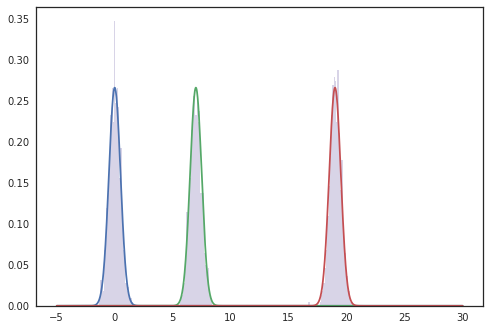

In [7]:
pts = np.linspace(-5, 30, 2000)
for mu,sigma,w in zip(MU, SIGMA, W):
  plt.plot(pts, norm(mu, sigma).pdf(pts)*w, label='mu={},sigma={}'.format(mu,sigma))
sns.distplot(y, kde=False, bins=200, hist_kws={"alpha": 0.3}, norm_hist=True)
#plt.legend()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


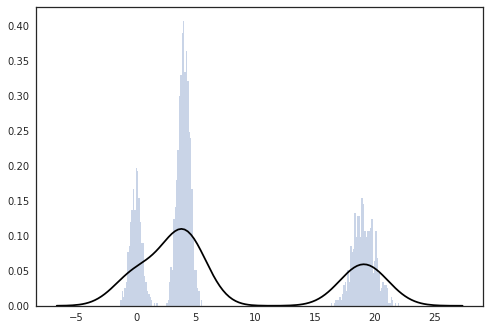

In [6]:
sns.distplot(y, bins=200,  hist_kws={"alpha": 0.3}, kde_kws={"color": "black"})

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


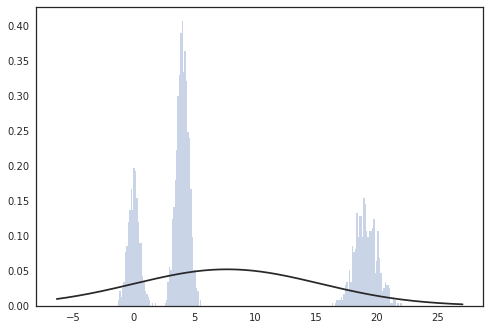

In [7]:
sns.distplot(y, bins=200,  hist_kws={"alpha": 0.3}, kde=False, fit=norm) # maximum likelihood gaussian distribution fit: